In [4]:
import os
import pandas as pd

# Path to your dataset
BASE_DIR = r"C:/Users/saad/BBCSPORT/bbcsport/"

categories = ["athletics", "cricket", "football", "rugby", "tennis"]

texts = []
labels = []

for category in categories:
    folder_path = os.path.join(BASE_DIR, category)
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            file_path = os.path.join(folder_path, file)
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()
                texts.append(text)
                labels.append(category)

df = pd.DataFrame({"text": texts, "label": labels})
df.head()


,text,label
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics


In [5]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,clean_text
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,osullivan could run world sonia osullivan indi...
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene set sight world title maurice greene ai...
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launch fight drug iaaf athletics world go...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba break world record ethiopia tirunesh di...


In [6]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_tfidf, y_train)

pred_lr = log_reg.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Logistic Regression Accuracy: 0.9594594594594594
              precision    recall  f1-score   support

   athletics       1.00      0.85      0.92        20
     cricket       1.00      0.96      0.98        25
    football       0.91      1.00      0.95        53
       rugby       0.97      1.00      0.98        30
      tennis       1.00      0.90      0.95        20

    accuracy                           0.96       148
   macro avg       0.98      0.94      0.96       148
weighted avg       0.96      0.96      0.96       148



In [9]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))


SVM Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

   athletics       1.00      0.95      0.97        20
     cricket       1.00      1.00      1.00        25
    football       0.98      0.98      0.98        53
       rugby       1.00      1.00      1.00        30
      tennis       0.95      1.00      0.98        20

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148



C:\Users\saad\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train_tfidf, y_train)

pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Random Forest Accuracy: 0.9797297297297297
              precision    recall  f1-score   support

   athletics       1.00      1.00      1.00        20
     cricket       1.00      1.00      1.00        25
    football       0.96      0.98      0.97        53
       rugby       1.00      0.97      0.98        30
      tennis       0.95      0.95      0.95        20

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



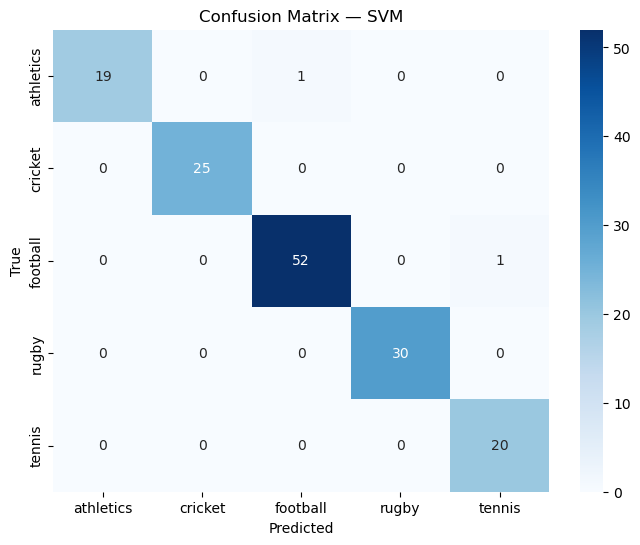

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
import pickle

with open("bbc_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("bbc_svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)

print("Model & vectorizer saved successfully!")


Model & vectorizer saved successfully!
